## In this module, you learned the basics of deep learning and the fundamental architecture of artificial neural networks. During the examples in the checkpoints, you used a MNIST dataset. In this challenge, you'll work with another dataset: fashion MNIST. Using this dataset, do the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
import time 

## Split your data into training and test sets.

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Preprocess your data so that you can feed it into ANN models.

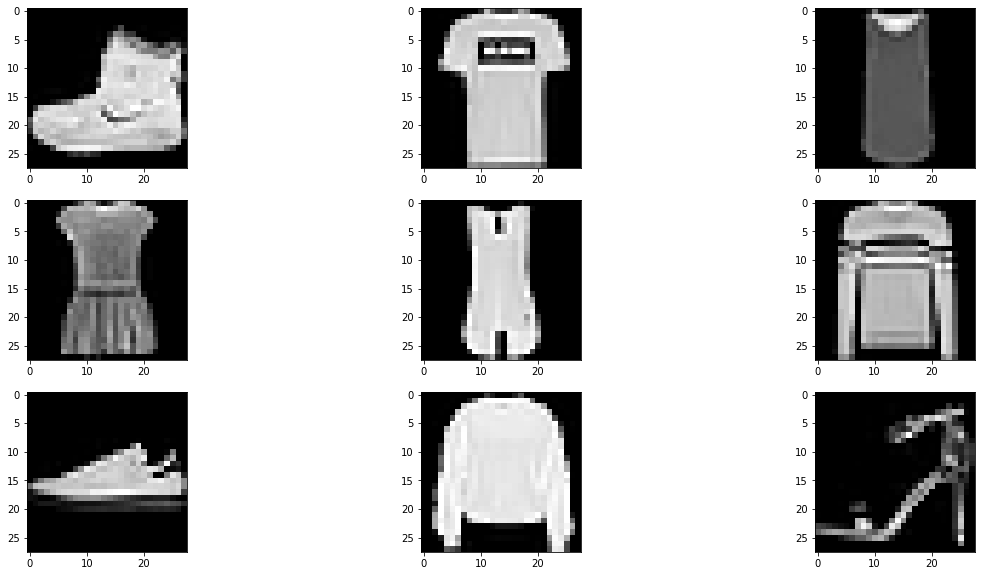

In [4]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

#resize image
fig = plt.gcf()
fig.set_size_inches(20, 10)
# show the figure
plt.show()

In [5]:
input_dim = X_train.shape[1] * X_train.shape[2]  # 28*28
output_dim = num_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [8]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Try different ANN models and train them on your training set. You can play with the following:

In [9]:
# make build model function
def build_3_layer_model(optimizer=SGD,activation='relu',output_activation='softmax',metrics='accuracy',
                loss='categorical_crossentropy',batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation=activation))
  # second layer
  model.add(Dense(64 ,activation=activation))
  # third layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history

# make model results visualization function
def model_results(model,history,model_name='Model'):
  # dataframe with epoch history
  model_df = pd.DataFrame(history.history)
  # plot model loss over epochs
  model_df[['loss', 'val_loss']].plot(figsize=(20,10))
  plt.title(f'{model_name} Loss'.capitalize() )
  plt.show()
  # plot model accuracy over epochs
  model_df[['accuracy', 'val_accuracy']].plot(figsize=(20,10))
  plt.title(f'{model_name} Accuracy'.capitalize() )
  plt.show()  
  # final epoch model train results
  results = model.evaluate(X_train, y_train, verbose=0)
  print(f'{model_name} Train Loss: '.capitalize() , round(results[0],6))
  print(f'{model_name} Train Accuracy: '.capitalize() , round(results[1],6))
  print('--------------------------------------------------------------')
  # final epoch model test results
  results = model.evaluate(X_test, y_test, verbose=0)
  print(f'{model_name} Test Loss: '.capitalize() , round(results[0],6))
  print(f'{model_name} Test Accuracy: '.capitalize() , round(results[1],6))
  print('--------------------------------------------------------------')

## 1) Compare Number of layers

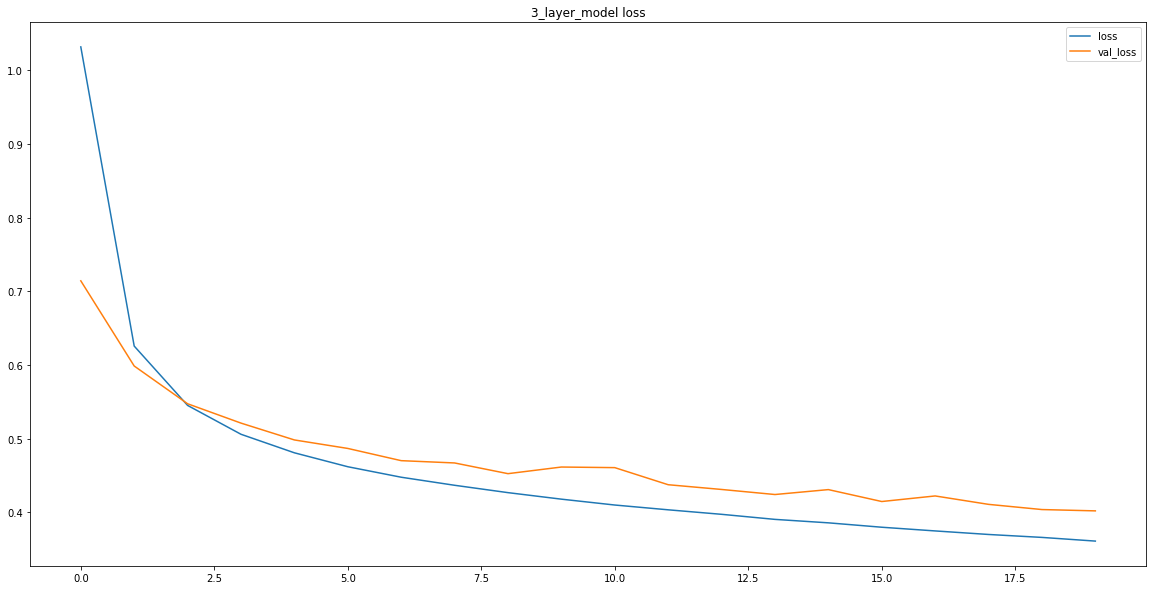

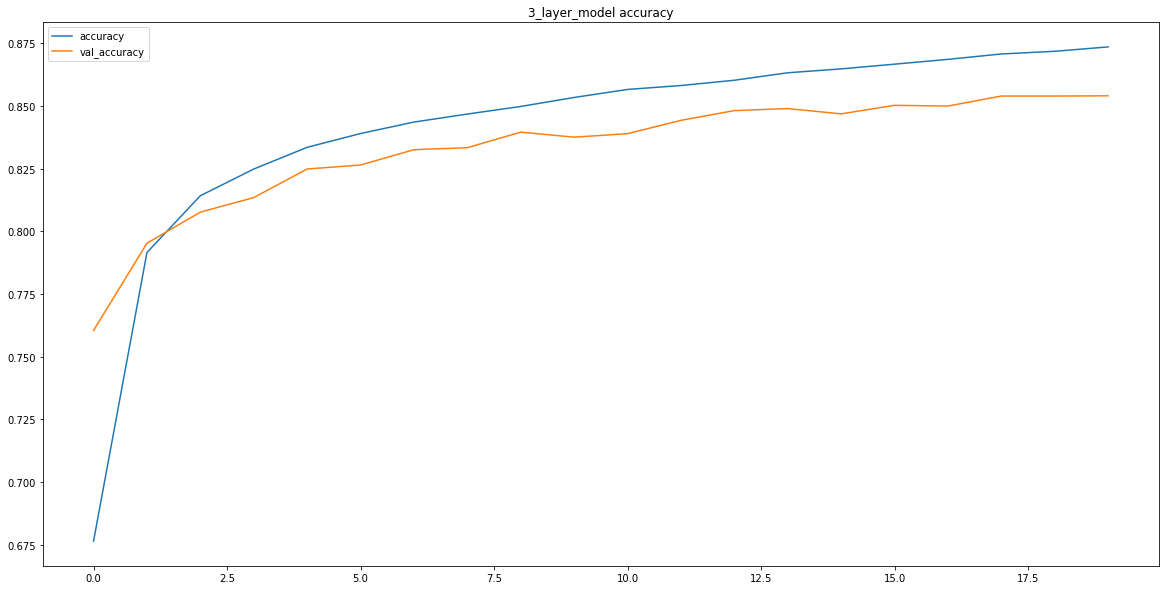

3_layer_model train loss:  0.353436
3_layer_model train accuracy:  0.876017
--------------------------------------------------------------
3_layer_model test loss:  0.402044
3_layer_model test accuracy:  0.8541
--------------------------------------------------------------
00 hours, 00 minutes, 28 seconds


In [10]:
# start run time
start_time = time.time() 

# 3 layer model
model_3_layers, model_3_layers_history = build_3_layer_model(epochs=nb_epoch)

# model results and visuals
model_3_layers_results = model_results(model_3_layers, model_3_layers_history, model_name='3_Layer_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

In [11]:
# make 5 layer build model function
def build_5_layer_model(optimizer=SGD,activation='relu',output_activation='softmax',metrics='accuracy',
                loss='categorical_crossentropy',batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation=activation))
  # second layer
  model.add(Dense(64 ,activation=activation))
  # third layer
  model.add(Dense(64 ,activation=activation))
  # fourth layer
  model.add(Dense(64 ,activation=activation))
  # fifth layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history

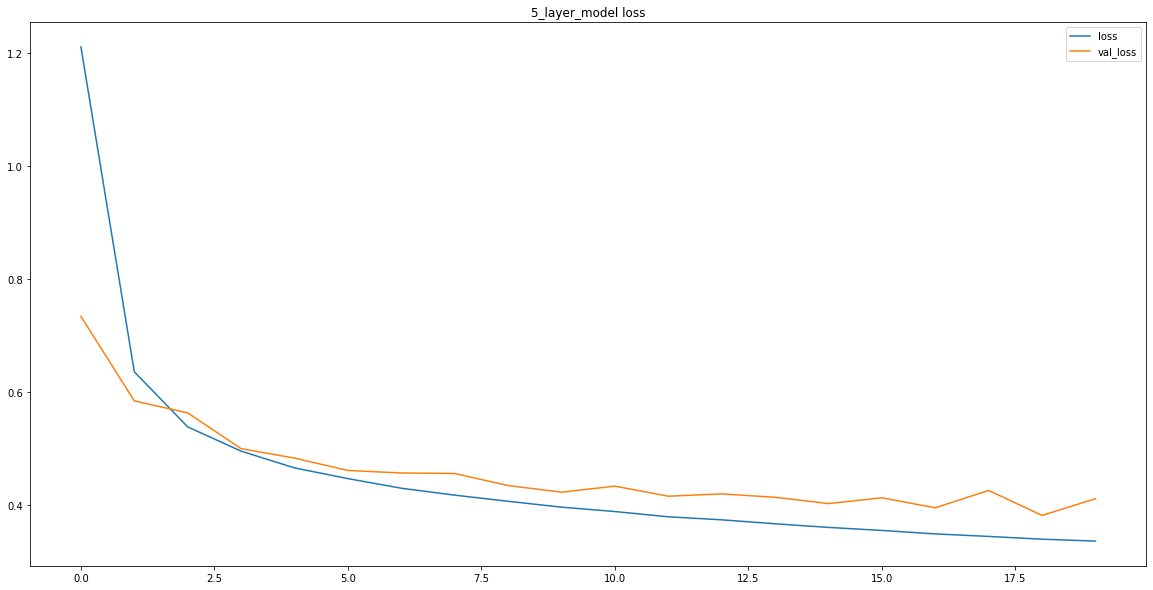

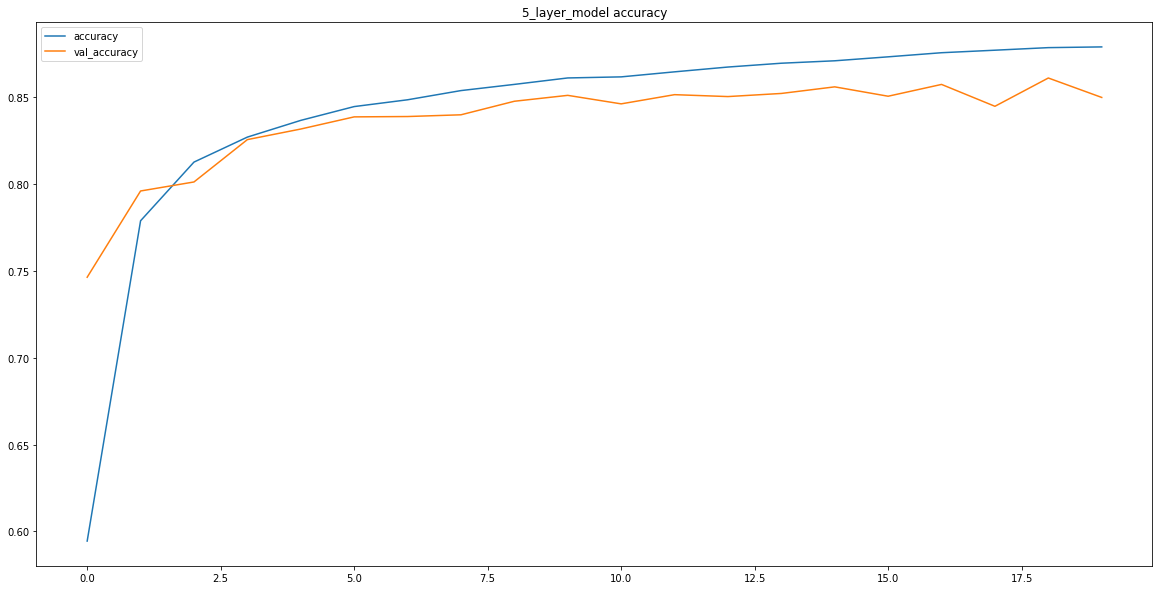

5_layer_model train loss:  0.350129
5_layer_model train accuracy:  0.873367
--------------------------------------------------------------
5_layer_model test loss:  0.411385
5_layer_model test accuracy:  0.85
--------------------------------------------------------------
00 hours, 00 minutes, 28 seconds


In [12]:
# start run time
start_time = time.time() 

# 5 layer model
model_5_layers, model_5_layers_history = build_5_layer_model(epochs=nb_epoch)

# model results and visuals
model_5_layers_results = model_results(model_5_layers, model_5_layers_history, model_name='5_Layer_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

In [13]:
# make 7 layer build model function
def build_7_layer_model(optimizer=SGD,activation='relu',output_activation='softmax',metrics='accuracy',
                loss='categorical_crossentropy',batch_size=100,epochs=200,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(128, input_dim=X_train.shape[1] ,activation=activation))
  # second layer
  model.add(Dense(64 ,activation=activation))
  # third layer
  model.add(Dense(64 ,activation=activation))
  # fourth layer
  model.add(Dense(64 ,activation=activation))
  # fifth layer
  model.add(Dense(64 ,activation=activation))
  # sixth layer
  model.add(Dense(64 ,activation=activation))
  # seventh layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history

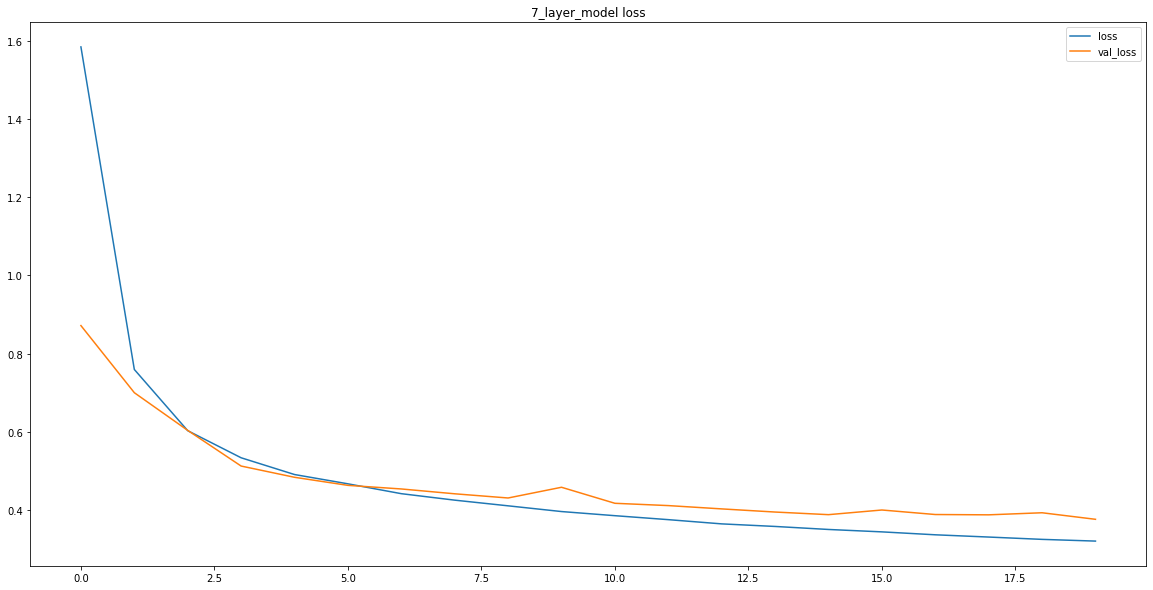

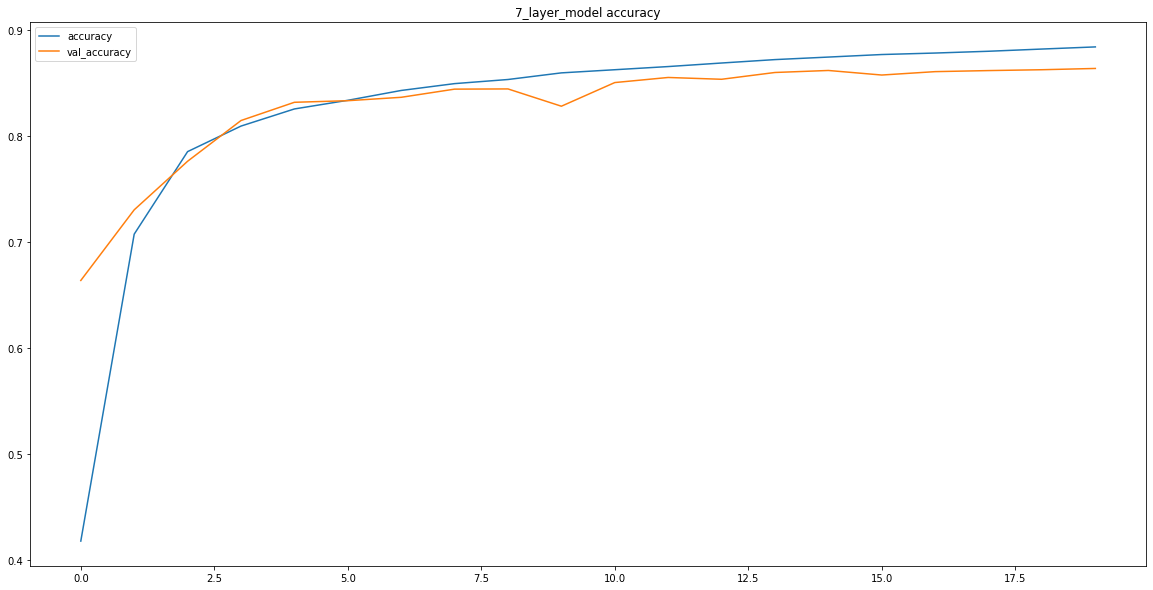

7_layer_model train loss:  0.309589
7_layer_model train accuracy:  0.887467
--------------------------------------------------------------
7_layer_model test loss:  0.375807
7_layer_model test accuracy:  0.8634
--------------------------------------------------------------
00 hours, 00 minutes, 30 seconds


In [14]:
# start run time
start_time = time.time() 

# 7 layer model
model_7_layers, model_7_layers_history = build_7_layer_model(epochs=nb_epoch)

# model results and visuals
model_7_layers_results = model_results(model_7_layers, model_7_layers_history, model_name='7_Layer_Model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Compare your models' training scores and interpret your results. Evaluate how your models perform on your test set. Compare the results of your models.

All 3 models seem to be overfitting a bit. The 7 layer model has the best train and test accuracy scores. It also has the lowest test loss. 

Since it performed the best, we will proceed with the 7 layer model for future hyperparameter tuning.

## 2) Compare Activation functions of the layers

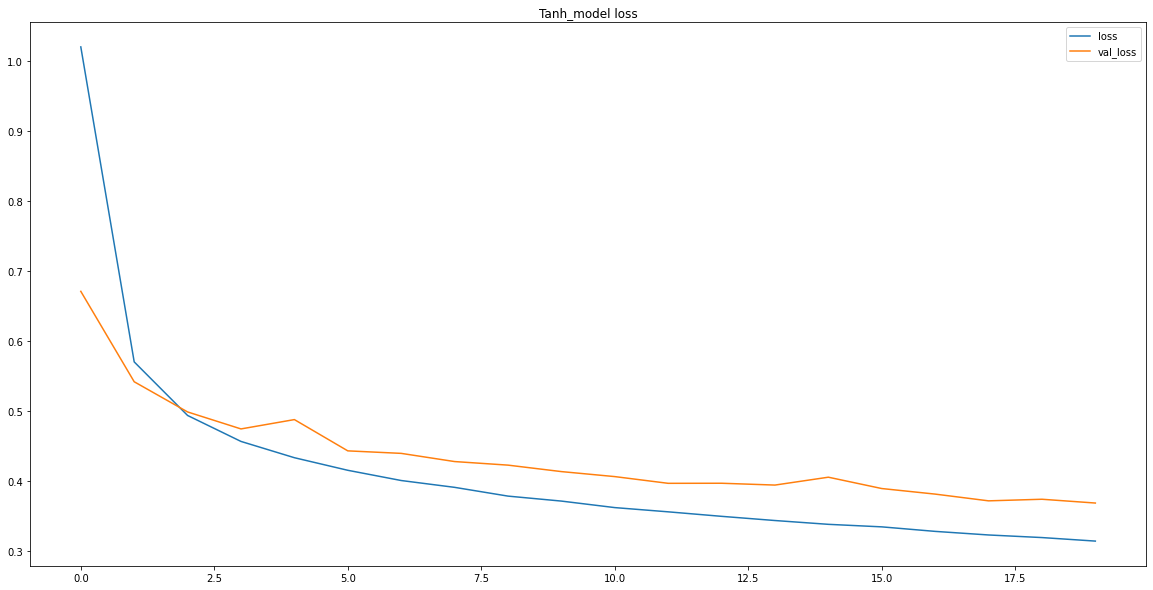

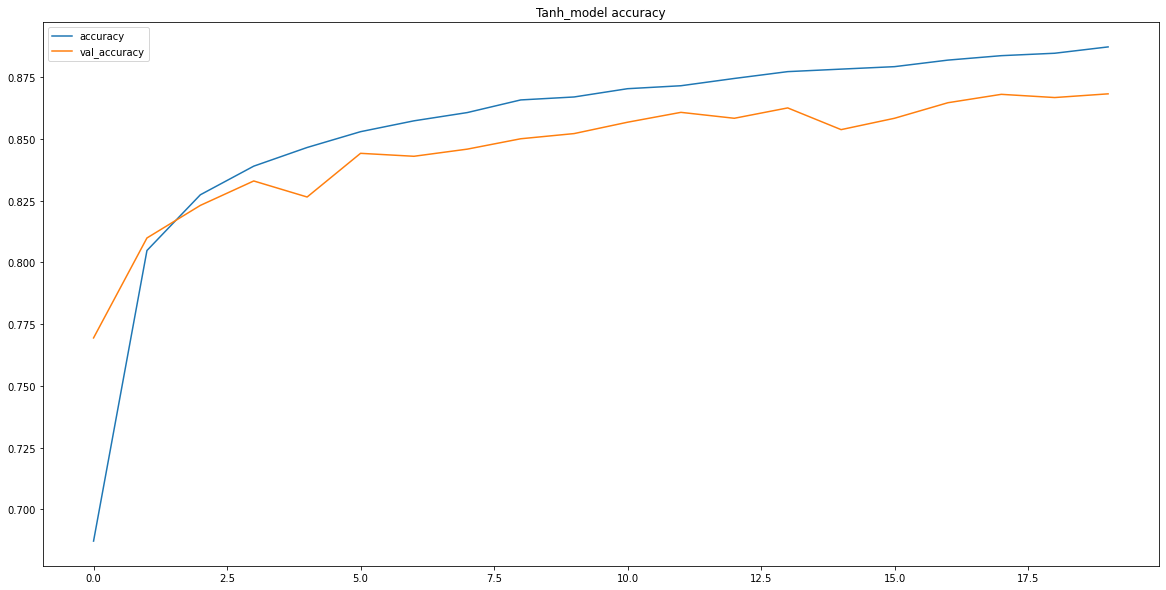

Tanh_model train loss:  0.302955
Tanh_model train accuracy:  0.89145
--------------------------------------------------------------
Tanh_model test loss:  0.368489
Tanh_model test accuracy:  0.8683
--------------------------------------------------------------
00 hours, 00 minutes, 31 seconds


In [15]:
# start run time
start_time = time.time() 

# TANH optimizer model
tanh_model, tanh_model_history = build_7_layer_model(activation='tanh',epochs=nb_epoch)

# model results and visuals
tanh_model_results = model_results(tanh_model, tanh_model_history, model_name='TANH_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

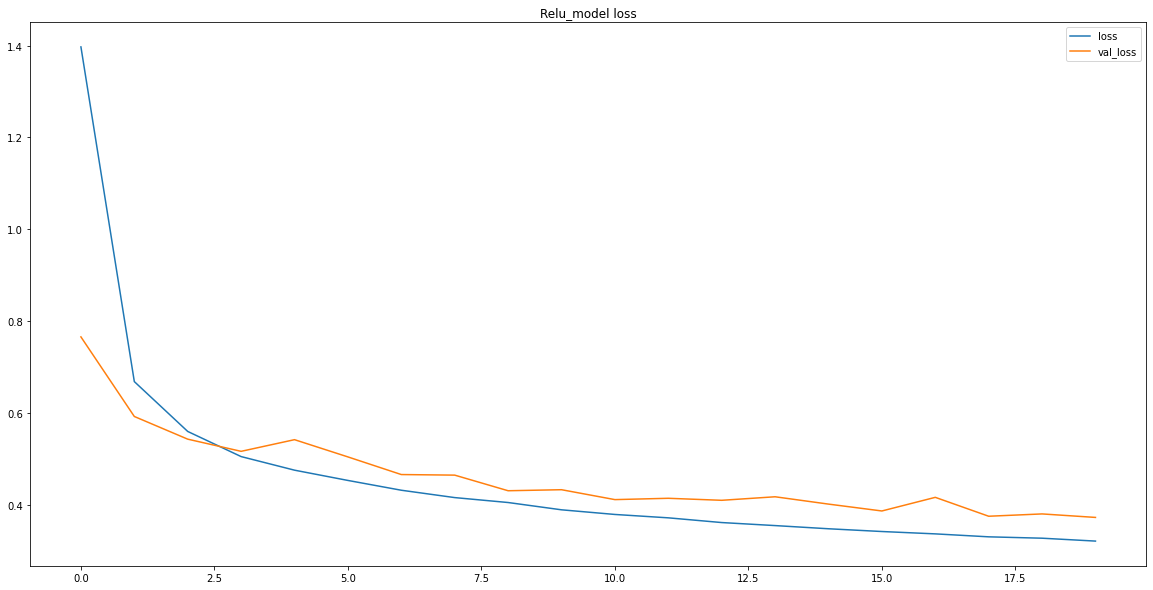

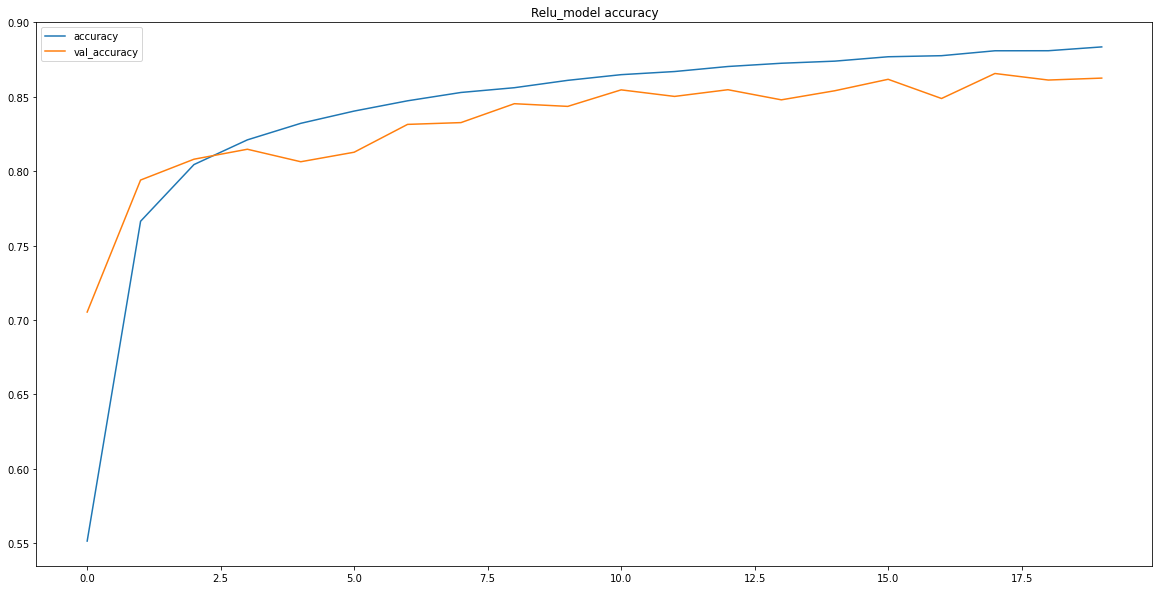

Relu_model train loss:  0.306748
Relu_model train accuracy:  0.8887
--------------------------------------------------------------
Relu_model test loss:  0.372209
Relu_model test accuracy:  0.8626
--------------------------------------------------------------
00 hours, 00 minutes, 30 seconds


In [16]:
# start run time
start_time = time.time() 

# RELU optimizer model
relu_model, relu_model_history = build_7_layer_model(activation='relu',epochs=nb_epoch)

# model results and visuals
relu_model_results = model_results(relu_model, relu_model_history, model_name='RELU_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

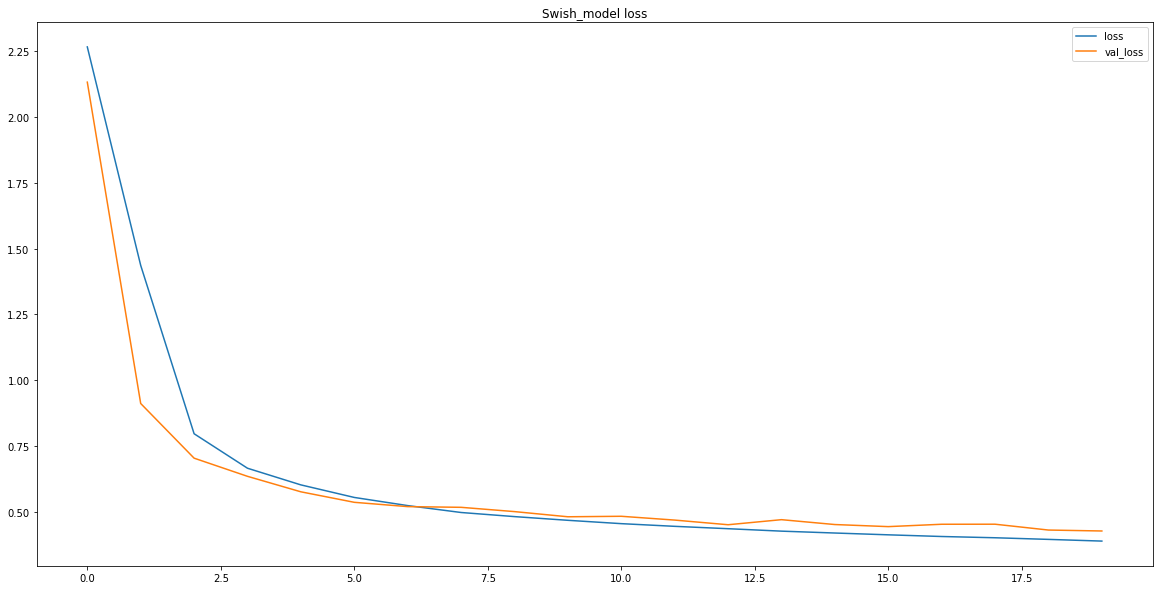

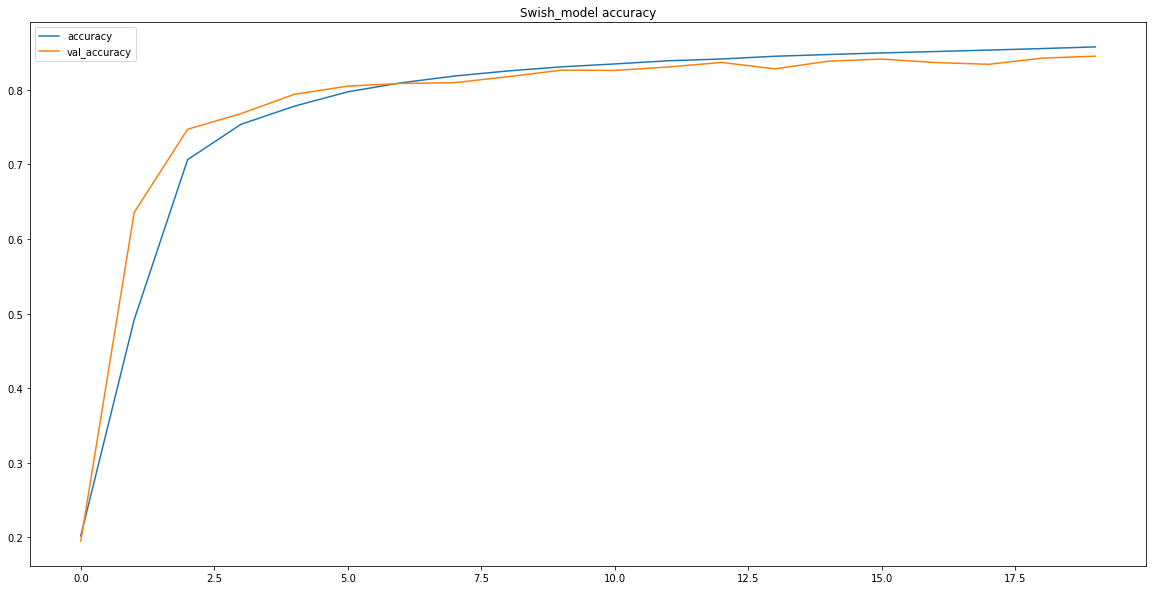

Swish_model train loss:  0.382677
Swish_model train accuracy:  0.8588
--------------------------------------------------------------
Swish_model test loss:  0.426099
Swish_model test accuracy:  0.8452
--------------------------------------------------------------
00 hours, 00 minutes, 34 seconds


In [18]:
# start run time
start_time = time.time() 

# swish optimizer model
swish_model, swish_model_history = build_7_layer_model(activation='swish',epochs=nb_epoch)

# model results and visuals
swish_model_results = model_results(swish_model, swish_model_history, model_name='Swish_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Compare your models' training scores and interpret your results. Evaluate how your models perform on your test set. Compare the results of your models.

The TANH model did slightly better than the RELU model on both the training and test data. Both models did significantly better than the swish model. However, the TANH and RELU models are overfitting more than the swish model

We will use the TANH model for future hyperparameter tuning since it performed best.

## 3) Compare Number of neurons in the layers

In [23]:
# make neuron build model function
def build_neuron_model(neurons=128,optimizer=SGD,activation='tanh',output_activation='softmax',metrics='accuracy',
                loss='categorical_crossentropy',batch_size=100,epochs=20,learning_rate=.01):
  # instantiate model
  model = Sequential()
  # first layer
  model.add(Dense(neurons, input_dim=X_train.shape[1] ,activation=activation))
  # second layer
  model.add(Dense(neurons ,activation=activation))
  # third layer
  model.add(Dense(neurons ,activation=activation))
  # fourth layer
  model.add(Dense(neurons ,activation=activation))
  # fifth layer
  model.add(Dense(neurons ,activation=activation))
  # sixth layer
  model.add(Dense(neurons ,activation=activation))
  # seventh layer/output layer with output activation
  model.add(Dense(y_train.shape[1] ,activation=output_activation))

  # create optimizer
  optimized=optimizer(lr=learning_rate)
  # compile model
  model.compile(optimizer=optimized, loss=loss, metrics=[metrics])
  # fit model and save to history
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=0)
  
  return model, history

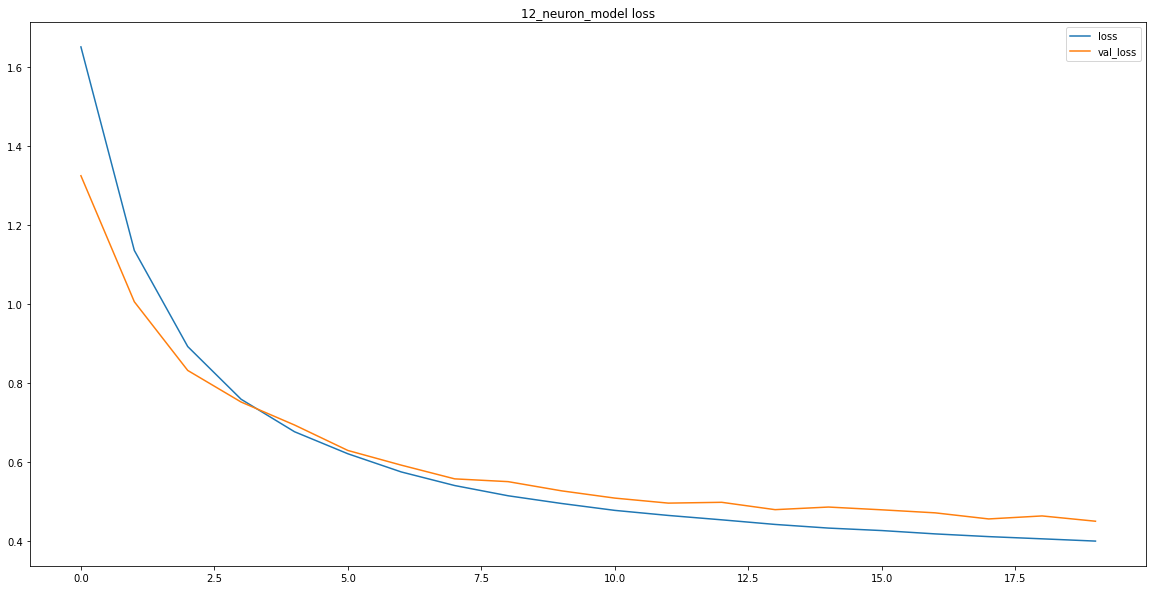

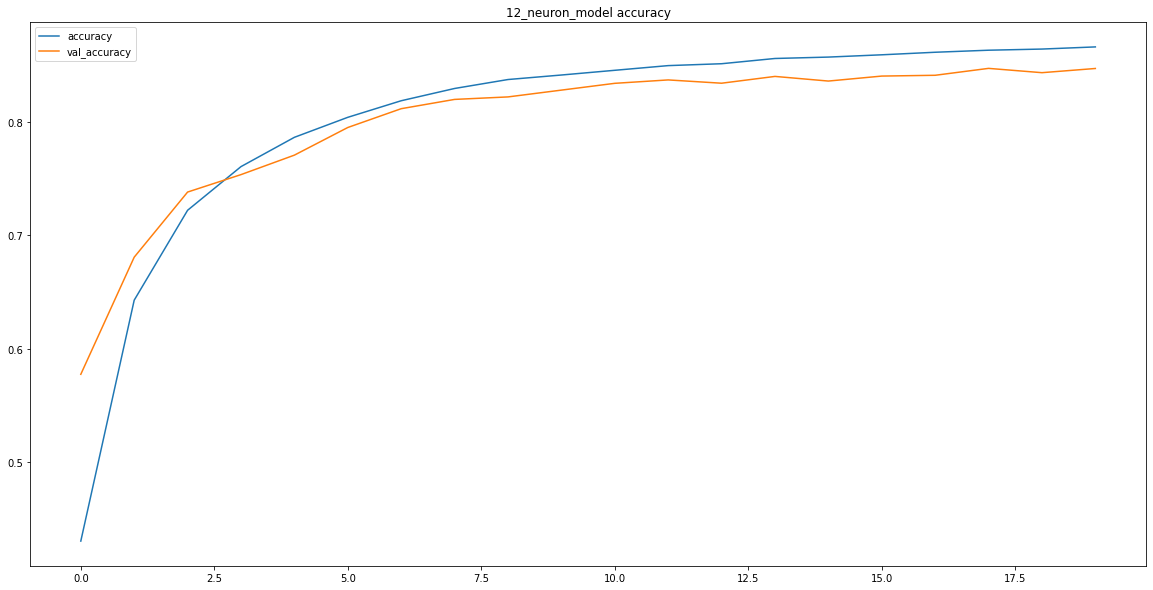

12_neuron_model train loss:  0.389466
12_neuron_model train accuracy:  0.869267
--------------------------------------------------------------
12_neuron_model test loss:  0.449164
12_neuron_model test accuracy:  0.8474
--------------------------------------------------------------
00 hours, 00 minutes, 31 seconds


In [24]:
# start run time
start_time = time.time() 

# 12 neuron model
model_12_neurons, model_12_neurons_history = build_neuron_model(neurons=12,epochs=nb_epoch)

# model results and visuals
model_12_neurons_results = model_results(model_12_neurons, model_12_neurons_history, model_name='12_neuron_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

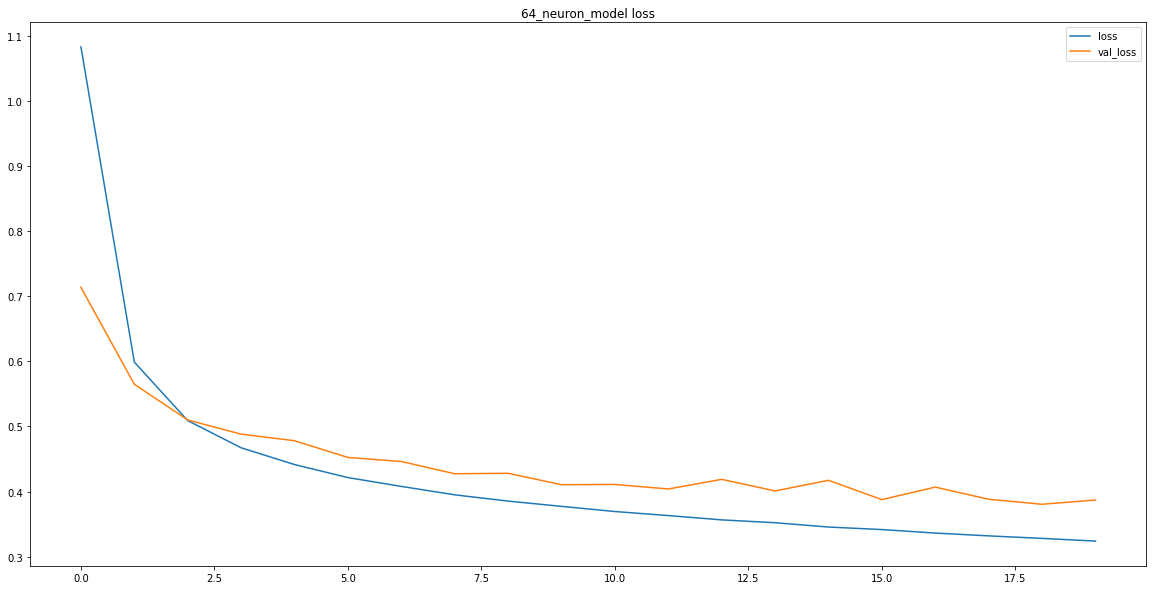

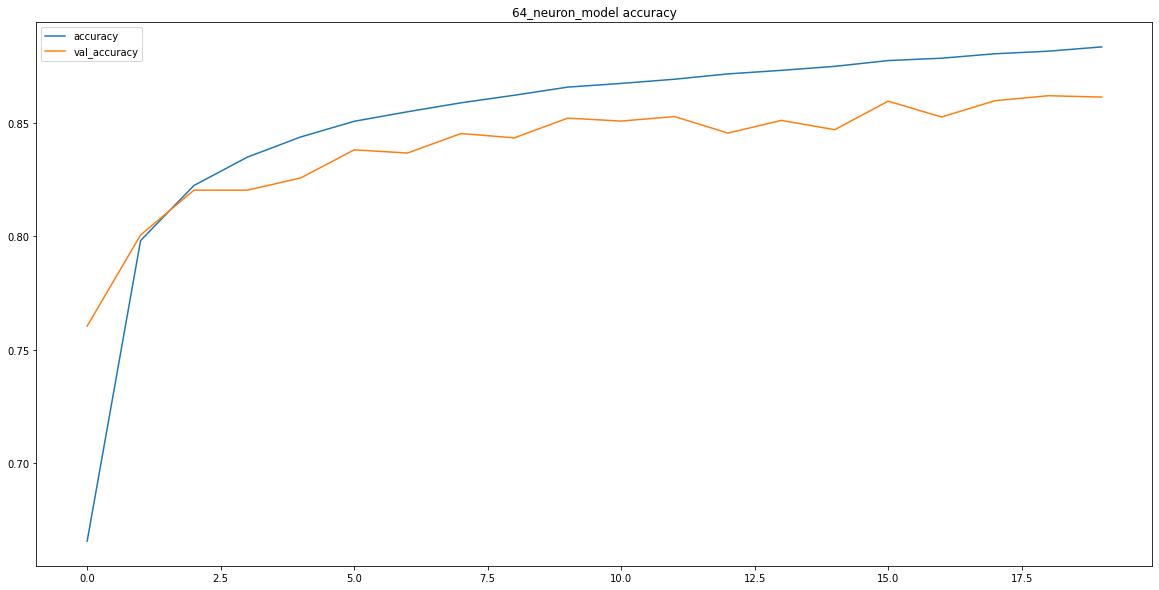

64_neuron_model train loss:  0.323197
64_neuron_model train accuracy:  0.883967
--------------------------------------------------------------
64_neuron_model test loss:  0.386916
64_neuron_model test accuracy:  0.8615
--------------------------------------------------------------
00 hours, 00 minutes, 31 seconds


In [25]:
# start run time
start_time = time.time() 

# 64 neuron model
model_64_neurons, model_64_neurons_history = build_neuron_model(neurons=64,epochs=nb_epoch)

# model results and visuals
model_64_neurons_results = model_results(model_64_neurons, model_64_neurons_history, model_name='64_neuron_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

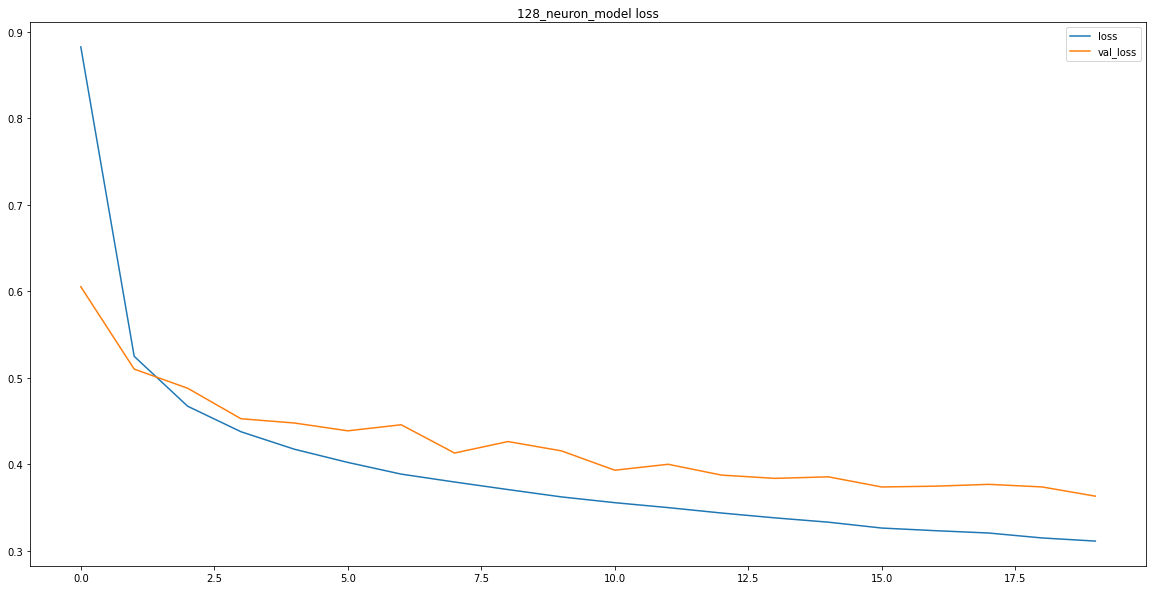

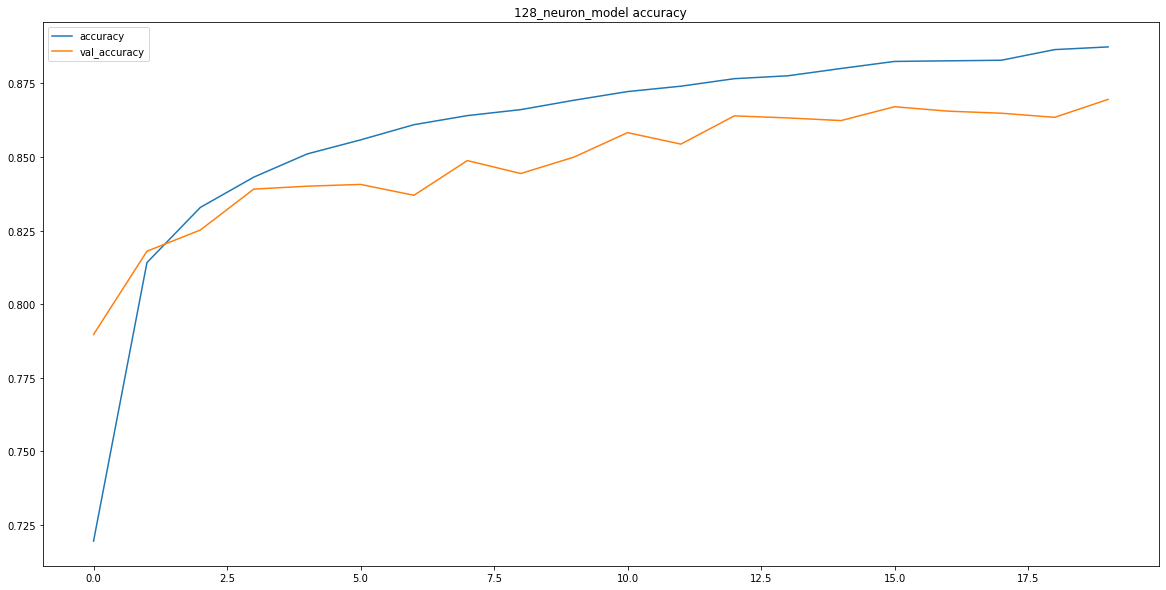

128_neuron_model train loss:  0.298231
128_neuron_model train accuracy:  0.891917
--------------------------------------------------------------
128_neuron_model test loss:  0.3631
128_neuron_model test accuracy:  0.8696
--------------------------------------------------------------
00 hours, 00 minutes, 31 seconds


In [26]:
# start run time
start_time = time.time() 

# 128 neuron model
model_128_neurons, model_128_neurons_history = build_neuron_model(neurons=128,epochs=nb_epoch)

# model results and visuals
model_128_neurons_results = model_results(model_128_neurons, model_128_neurons_history, model_name='128_neuron_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Compare your models' training scores and interpret your results. Evaluate how your models perform on your test set. Compare the results of your models.

The 128 neuron and 64 neuron model were significantly more accurate than the 12 neuron model on both the training and test set. This is because a 12 neuron model cannot capture all the complexity of this dataset. The 128 nueron model performed slightly better than the 64 nueron model on both training and test data. It had slightly higher test accuracy and test loss. All 3 models are overfitting a bit. 

We will use the 128 neuron model for future hyperparameter tuning since it performed best.

## 4) Compare Different batch sizes during training

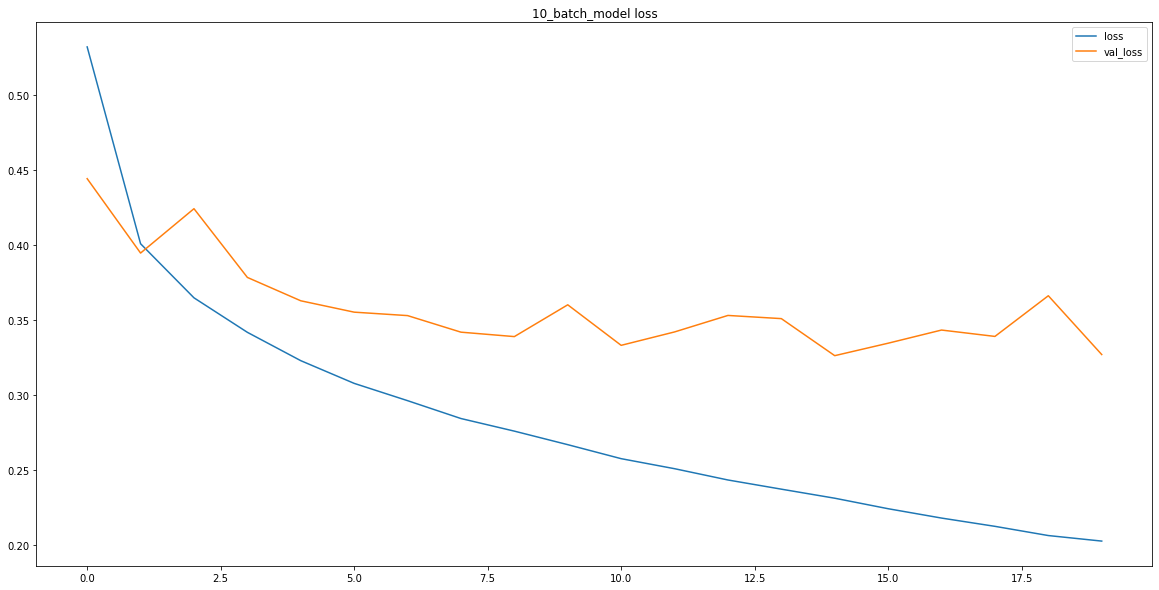

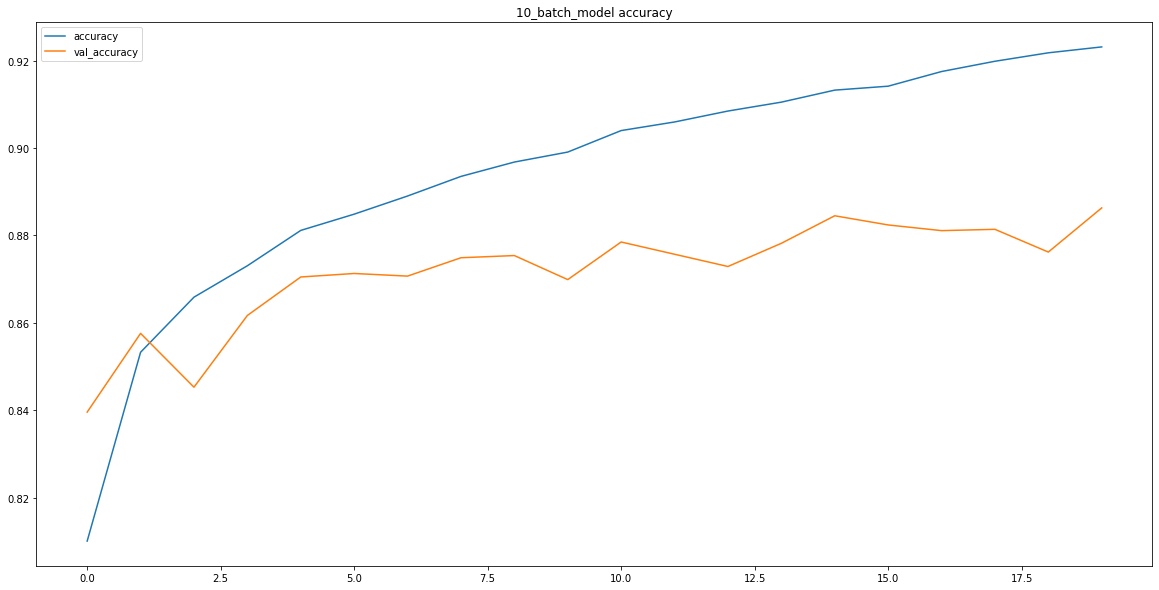

10_batch_model train loss:  0.185357
10_batch_model train accuracy:  0.929883
--------------------------------------------------------------
10_batch_model test loss:  0.326975
10_batch_model test accuracy:  0.8863
--------------------------------------------------------------
00 hours, 03 minutes, 47 seconds


In [27]:
# start run time
start_time = time.time() 

# 10 batch size model
model_10_batch, model_10_batch_history = build_neuron_model(batch_size=10,neurons=128,epochs=nb_epoch)

# model results and visuals
model_10_batch_results = model_results(model_10_batch, model_10_batch_history, model_name='10_batch_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

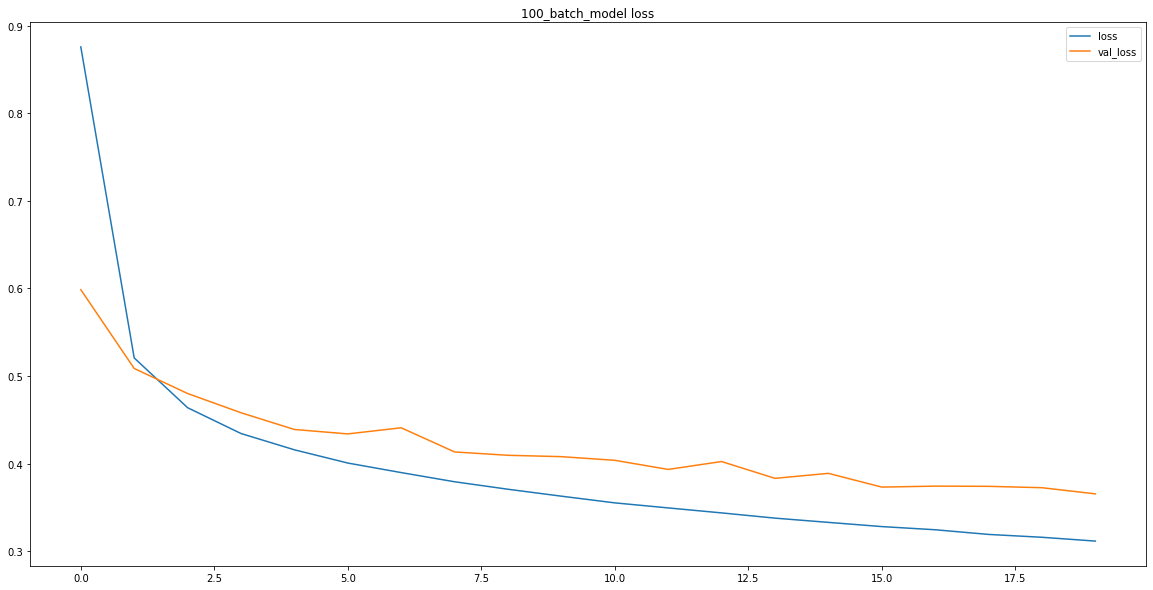

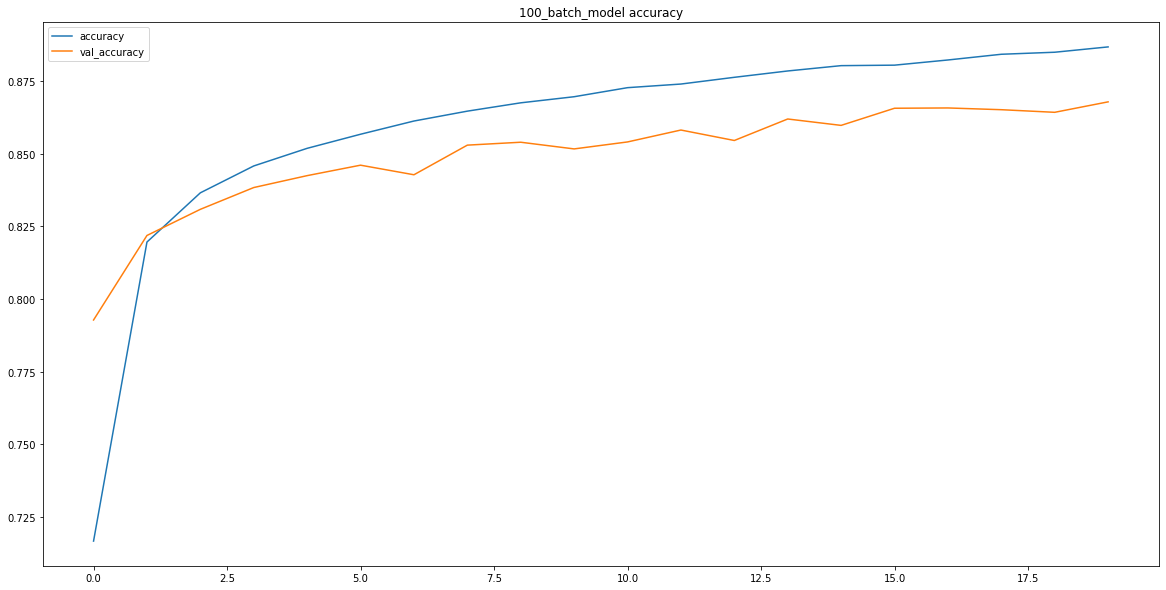

100_batch_model train loss:  0.300895
100_batch_model train accuracy:  0.890633
--------------------------------------------------------------
100_batch_model test loss:  0.365343
100_batch_model test accuracy:  0.8679
--------------------------------------------------------------
00 hours, 00 minutes, 32 seconds


In [29]:
# start run time
start_time = time.time() 

# 100 batch size model
model_100_batch, model_100_batch_history = build_neuron_model(batch_size=100,neurons=128,epochs=nb_epoch)

# model results and visuals
model_100_batch_results = model_results(model_100_batch, model_100_batch_history, model_name='100_batch_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

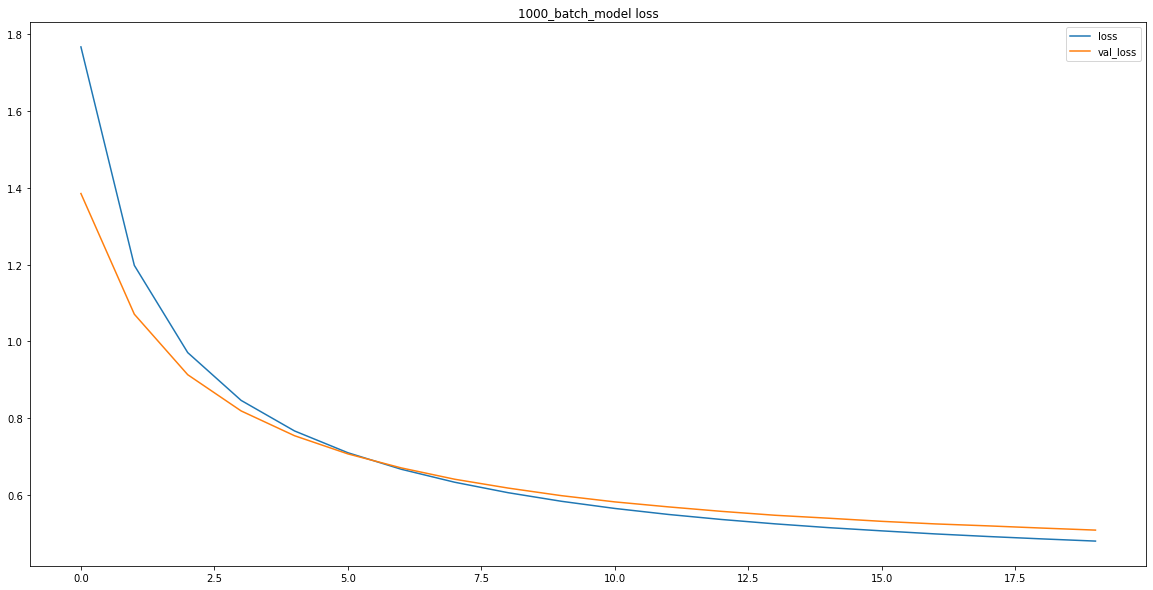

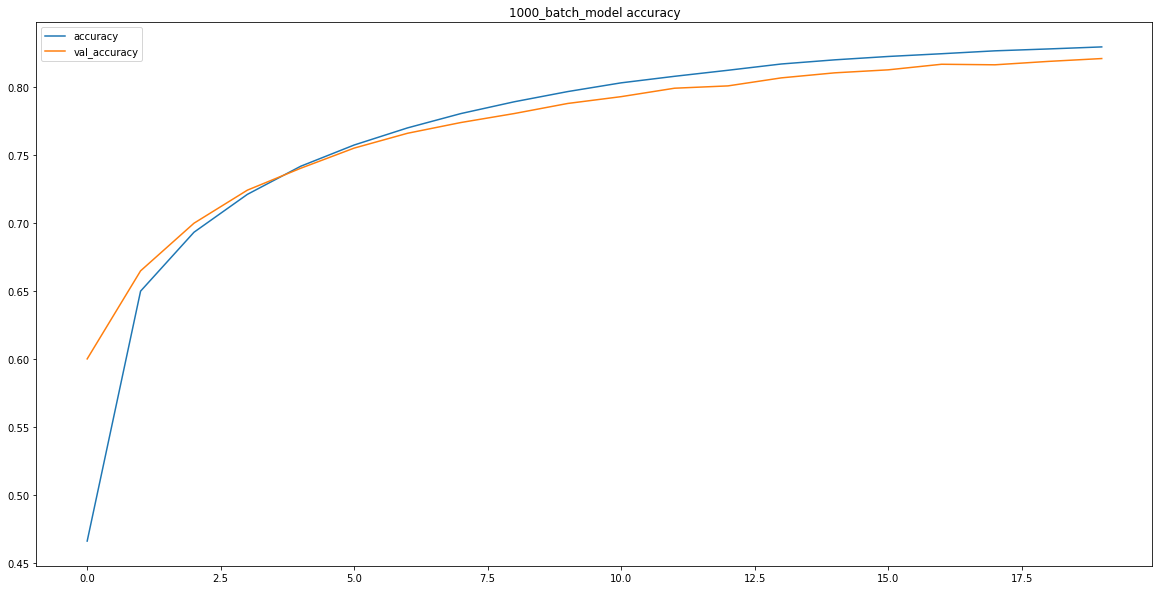

1000_batch_model train loss:  0.47599
1000_batch_model train accuracy:  0.831033
--------------------------------------------------------------
1000_batch_model test loss:  0.508012
1000_batch_model test accuracy:  0.8209
--------------------------------------------------------------
00 hours, 00 minutes, 10 seconds


In [30]:
# start run time
start_time = time.time() 

# 1000 batch size model
model_1000_batch, model_1000_batch_history = build_neuron_model(batch_size=1000,neurons=128,epochs=nb_epoch)

# model results and visuals
model_1000_batch_results = model_results(model_1000_batch, model_1000_batch_history, model_name='1000_batch_model')

# print runtime
print(time.strftime(f'%H hours, %M minutes, %S seconds', time.gmtime(time.time() - start_time)))

## Compare your models' training scores and interpret your results. Evaluate how your models perform on your test set. Compare the results of your models.

The smallest batch size (10) had the best train and test accuracy, but overfit the most and had the longest run time. As batch size increased model test performance dropped, but the model overfit less. This makes sense because a larger batch size means more training data is being passed through our model. So its not suprising that our model should overfit less when it has more data to train on.

Overall, the optimal number of layers was 7, the optimal activation function was tanh, the optimal number of nuerons was 128, and the optimal batch size was 10 (with the caveat of overfitting).